<center><font size="+3">Machine Learning - Neural Networks - Deep Learning</font></center>

https://www.techemergence.com/what-is-machine-learning/


-    “Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia 
-    <span style="color:blue">“Machine learning is the science of getting computers to act without being explicitly programmed.” – Stanford</span>
-    <span style="color:blue">“Machine learning is based on algorithms that can learn from data without relying on rules-based programming.”- McKinsey & Co.</span>
-    “Machine learning algorithms can figure out how to perform important tasks by generalizing from examples.” – University of Washington
-    “The field of Machine Learning seeks to answer the question “How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?” – Carnegie Mellon University


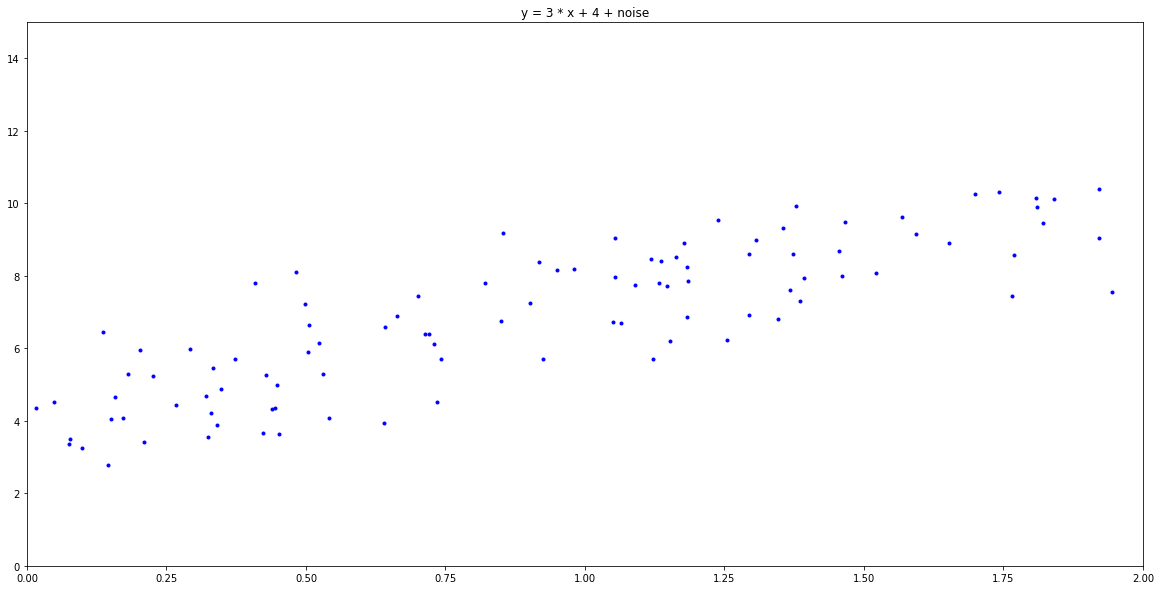

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100 ,1)), X]

plt.title('y = 3 * x + 4 + noise')
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

<center><font size="+3">Linear Regression:</font></center></br>
- Probeer een rechte lijn te vinden die het "beste" past, dus het minste afwijkt ("lowest costs"). 
- "Cost"-functie is MSE (Mean Square Error) : MSE(X, h<sub>&theta;</sub>) = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}$(&theta;<sup>T</sup> $\cdot$  x<sup>(i)</sup> - y<sup>(i)</sup>)<sup>2</sup>
- Cost functie is een convex functie, dus &#233;&#233;n minimum!
- Exact te berekenen via de "Normaal Vergelijkingen"
- &theta; = (X<sup>T</sup> * X)<sup>-1</sup> * X<sup>T</sup> * y
- Matrix inversie van een n x n matrix is een "dure" operatie: 2*n<sup>3</sup>/3 operaties.

[[ 3.73753707]
 [ 3.16674736]]


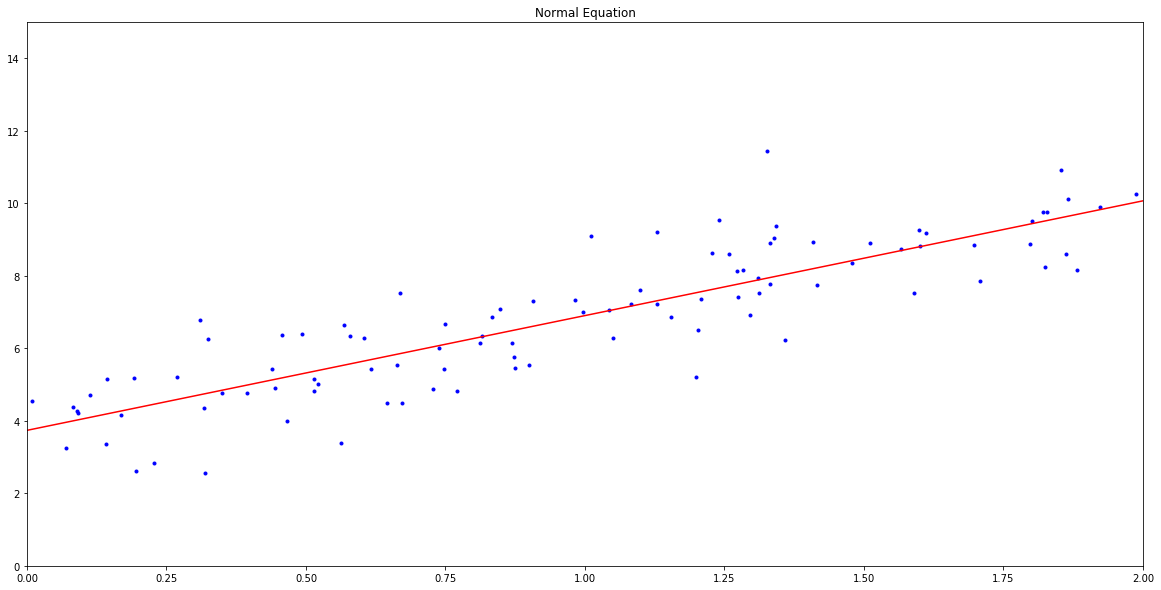

In [49]:
#Calculate Normal Equation
theta_norm = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(str(theta_norm))

#Make predictions
X_new_norm = np.array([[0], [2]])
X_new_norm_b = np.c_[np.ones((2,1)), X_new_norm]
y_pred_norm = X_new_norm_b.dot(theta_norm)

plt.title('Normal Equation')
plt.plot(X,y,"b.")
plt.plot(X_new_norm, y_pred_norm, "r-")
plt.axis([0,2,0,15])
plt.show()

<center><font size="+3">Gradient Descent</font></center></br>
- Gebruik afgeleide van de cost functie om het minimum van de cost-functie te vinden
- MSE is convex, dus geen meogelijkheid om te blijven hangen in lokale minima
- Is veelal "goedkoper" dan Normaal Vergelijkingen.
- Belangrijke parameter is de "step size" 
- MSE Cost functie: MSE(X, h<sub>&theta;</sub>) = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}$(&theta;<sup>T</sup> $\cdot$  x<sup>(i)</sup> - y<sup>(i)</sup>)<sup>2</sup>
- Afgeleide van de Cost functie: $\frac{\partial Cost}{\partial \theta_{j}}$ = $\frac{2}{m}\displaystyle\sum_{i=1}^{m}$(&theta;<sup>T</sup> $\cdot$  x<sup>(i)</sup> - y<sup>(i)</sup>) $\cdot$ x<sub>j</sub><sup>(i)</sup>
- &theta;<sub>new</sub> = &theta;<sub>old</sub> - &alpha; * $\frac{\partial Cost}{\partial \theta_{j}}$


![Gradient Descent](images/ball.png?raw=true)
<font size="+2">&theta;<sub>new</sub> = &theta;<sub>old</sub> - &alpha; * dCost/d&theta;</font>



![Learning rate](images/learning-rate.jpg?raw=true)
<font size="+2">&theta;<sub>new</sub> = &theta;<sub>old</sub> - &alpha; * dCost/d&theta;</font>


[[ 3.73753707]
 [ 3.16674736]]


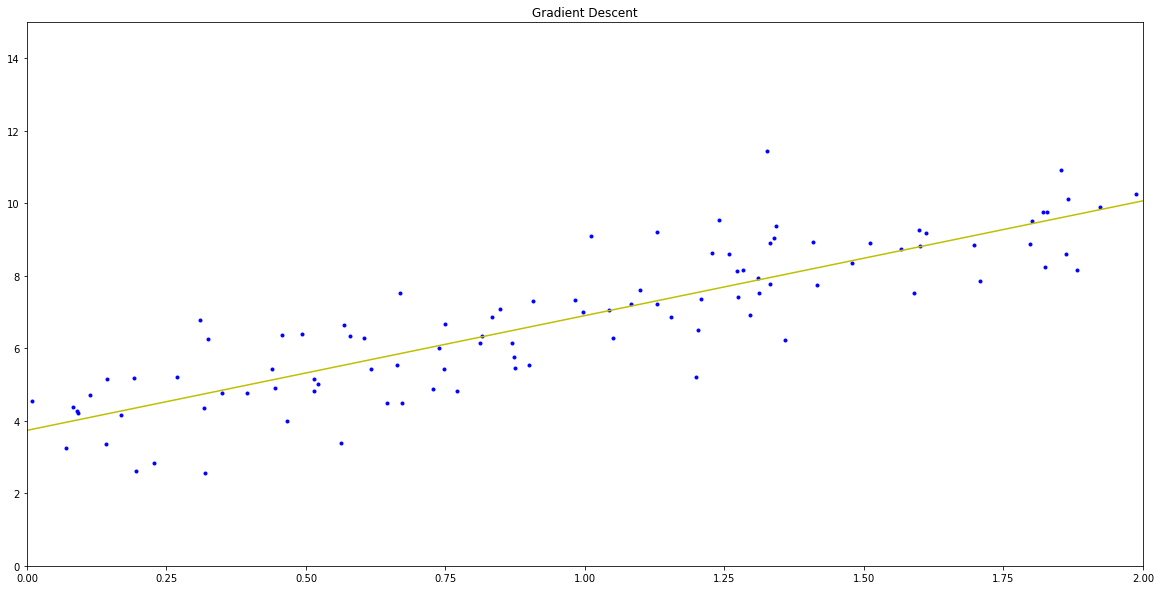

In [50]:
# Do a gradient descent
eta =0.1
n_iterations = 1000
m = 100

theta_grad = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_grad) - y)
    theta_grad = theta_grad - eta * gradients
    
print(str(theta_grad))    
# Make prediction     
X_new_grad = np.array([[0], [2]])
X_new_grad_b = np.c_[np.ones((2,1)), X_new_grad]
y_pred_grad = X_new_grad_b.dot(theta_grad)


plt.title('Gradient Descent')
plt.plot(X,y,"b.")
plt.plot(X_new_grad, y_pred_grad, "y-")
plt.axis([0,2,0,15])
plt.show()


<center><font size="+3">Polynomial Regression:</font></center></br>
    - Voeg machten van features toe als nieuwe features
    - Train als een lineair model via Linear Regression
    - Op deze manier zijn complexe functies mogelijk
    


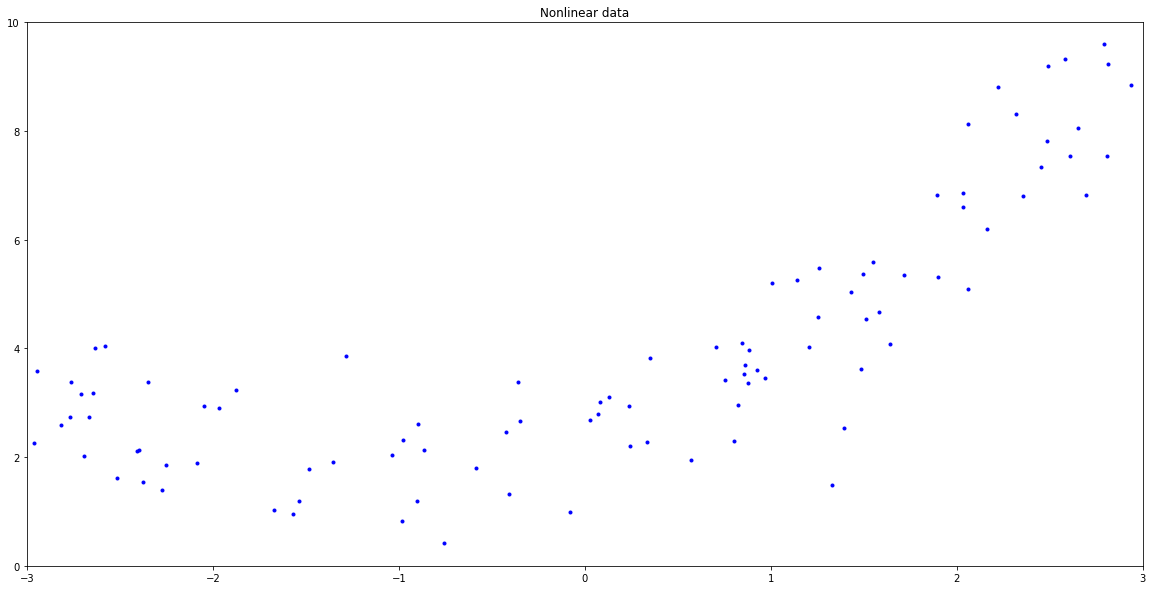

In [51]:
m = 100
X_poly = 6 * np.random.rand(m , 1) - 3
y_poly = 0.5 * X_poly ** 2 + X_poly + 2 + np.random.randn(m, 1)

plt.title('Nonlinear data')
plt.plot(X_poly,y_poly,"b.")
plt.axis([-3,3,0,10])
plt.show()


In [56]:
from sklearn.preprocessing import PolynomialFeatures
# Create extra features
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_extra_feat = poly_features.fit_transform(X_poly)
print("X_poly[0] = " + str(X_poly[0]))
print("X_extra_feat[0] = " + str(X_extra_feat[0]))



X_poly[0] = [-2.81443521]
X_extra_feat[0] = [-2.81443521  7.92104553]


In [57]:
from sklearn.linear_model import LinearRegression
# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_extra_feat, y_poly)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.32432198]), array([[ 1.0554416 ,  0.46858566]]))

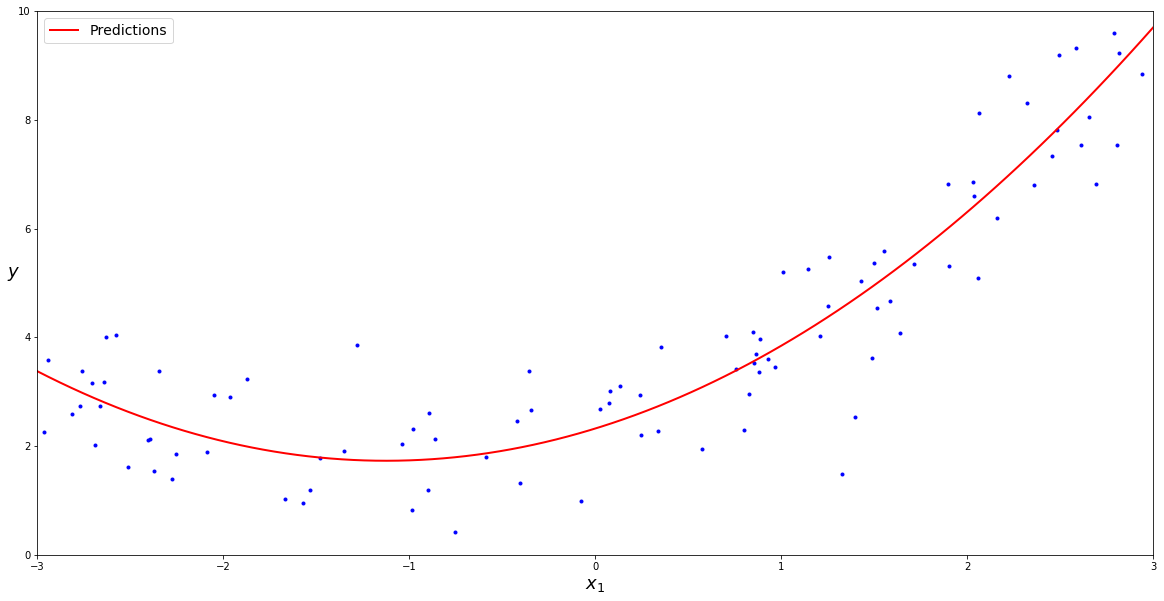

In [58]:
# Create a test set and show results
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_poly, y_poly, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

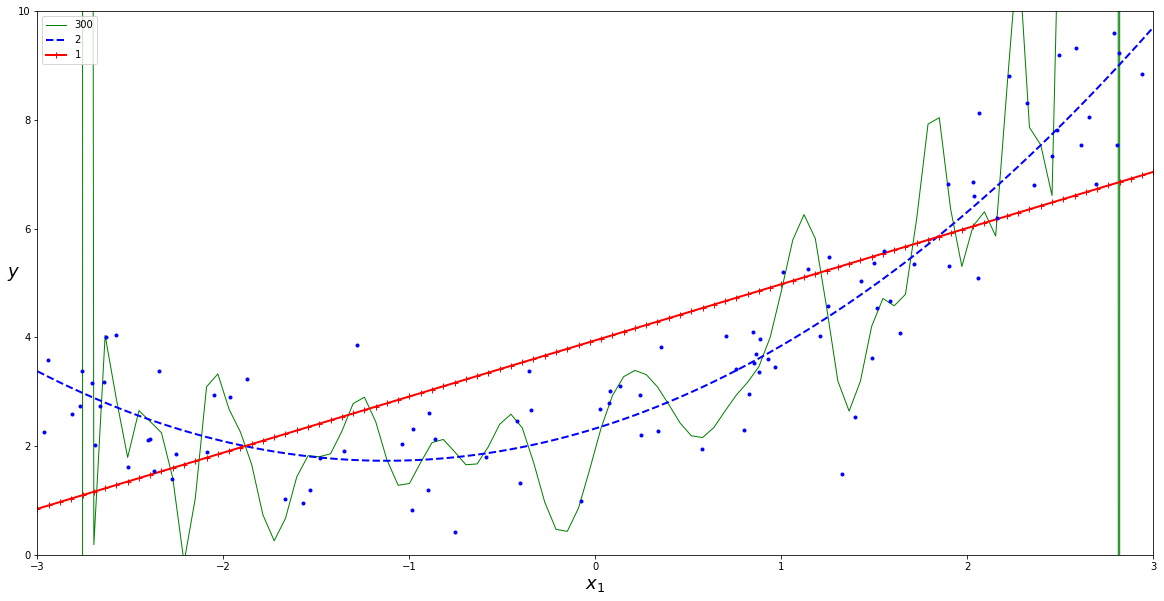

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X_poly, y_poly)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)


plt.plot(X_poly, y_poly, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<center><font size="+3">Over and Under fitting</font></center></br>
- Performance testen op trainingsset geeft lage fout maar testen op testset geeft hoge fout -> Over fitting (high variance) -> Regularization
- Performance testen op trainingsset en testen op testset geeft hoge fout -> Under fitting (high bias) -> meer data, model complexer maken (hogere polynomen)
 

<center><font size="+3">Logistic  Regression:</font></center></br>
- I.p.v directe uitvoer van waarde, deze door de "logistic"-functie halen (sigmoid-functie)
- Op deze manier wordt een binaire classificator gemaakt
- Geeft kans dat instantie tot een klasse behoort ( p > 0.5 )
- Aangepaste cost-functie en afgeleide hiervan
    
![Sigmoid function](images/sigmoid.gif?raw=true)
<br><hr><br>
<center><font size="+3">Softmax Regression:</font></center></br>
- Softmax is een generalisatie van een aantal Logistic Regression units.
- "One versus all"-classificatie  
- Aangepaste cost-functie en afgeleide hiervan

![Sigmoid function](images/softmax.png?raw=true)



In [4]:


from sklearn import datasets
iris = datasets.load_iris()

In [5]:
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
    

SyntaxError: invalid syntax (<ipython-input-5-aeb823dc06d9>, line 1)

In [10]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ilP4aPDTBPE" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')